Матрица А
 [[-128.   64.    0.    0.    0.    0.    0.]
 [  64. -128.   64.    0.    0.    0.    0.]
 [   0.   64. -128.   64.    0.    0.    0.]
 [   0.    0.   64. -128.   64.    0.    0.]
 [   0.    0.    0.   64. -128.   64.    0.]
 [   0.    0.    0.    0.   64. -128.   64.]
 [   0.    0.    0.    0.    0.   64. -128.]]
[[ 3.    31.104  0.412 18.872 24.275 16.622  4.088 37.854 12.   ]
 [ 3.    11.378 15.316 18.128 19.816 20.378 19.816 18.128 12.   ]
 [ 3.     5.805  7.588  9.109 10.365 11.359 12.088 12.555 12.   ]
 [ 3.     4.514  5.792  7.009  8.164  9.259 10.292 11.264 12.   ]
 [ 3.     4.215  5.376  6.522  7.654  8.772  9.876 10.965 12.   ]
 [ 3.     4.146  5.279  6.409  7.536  8.659  9.779 10.896 12.   ]
 [ 3.     4.13   5.257  6.383  7.508  8.633  9.757 10.88  12.   ]
 [ 3.     4.126  5.252  6.377  7.502  8.627  9.752 10.876 12.   ]
 [ 3.     4.125  5.25   6.375  7.5    8.625  9.75  10.875 12.   ]
 [ 3.     4.125  5.25   6.375  7.5    8.625  9.75  10.875 12.   ]]
Матрица собс

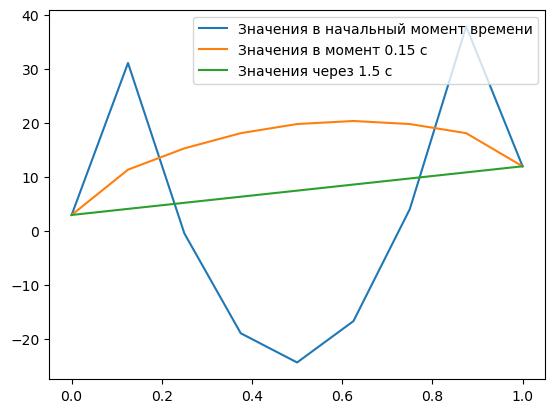

In [49]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)

g = 3
s = 12
n = 8
nt = 10
m = n-1
alpha = 1
h = 1/n
tau = 1.5/nt
c = alpha / h**2
E = np.eye(m)
a1 = np.ones((m-1,))
A = -2*E + np.diag(a1,1) + np.diag(a1,-1)
A = c*A
print('Матрица А\n', A)

F = np.zeros((m, 1))
F[0] = g
F[m-1] = s
F = c*F
res = np.empty((nt, n+1))
res[:nt, 0] = g
res[:nt, n] = s
print(res)

x = np.arange(0, 1+h, h)
psi = g + (g+3*s)*x[1:-1] - 2*(g+s)*x[1:-1]**2
J, T = np.linalg.eig(A)
print('Матрица собственных векторов\n',T)
print('Собственные значения\n', J)

T_inv = np.linalg.inv(T)
print('Матрица обратная к матрице Т\n', T_inv)
t_res = []
for k in range(nt):
    t = tau*k
    ETJ = np.exp(t*J)
    EAt = T@ETJ@T_inv
    u = EAt@psi - np.linalg.inv(A)@(E-EAt)@F
    res[k,1:-1] = u[:,0]
    t_res.append(t)
print('Массив координат точек табуляции по времени\n', t_res)
print('Массив значений температуры в точках табуляции\n', res)

plt.plot(x, res[0], label='Значения в начальный момент времени')
plt.plot(x, res[1], label=f'Значения в момент {tau} с')
plt.plot(x, res[-1], label='Значения через 1.5 с')
plt.legend()